# '''Simulations for Figure 2h and 2i'''

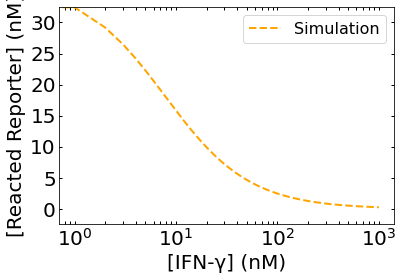

In [1]:
# Import Packages

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math



# Define function for the ARTIST reaction

def ARTIST_rxn(y, t, k_txn, k_sd, dART, Reporter0):
    RNA, Reporter_reacted = y
    dRNAdt = k_txn*dART - k_sd*RNA*Reporter0 + k_sd*RNA*Reporter_reacted
    dReporter_reacteddt = k_sd*RNA*Reporter0 - k_sd*RNA*Reporter_reacted
    return [dRNAdt, dReporter_reacteddt]


# Initial conditions
RNA0 = 0 # Initial RNA concentration
Reporter_reacted0 = 0.0 #Initial reacted reporter concentration
dART_0 = 1 # Change initial dART concentration here.
k_txn = 0.0046 * 60 # Txn rate constant (fitted)
k_sd = 1e5/1e9 * 60 # Strand displacement rate constant based on 6 bp toe-hold
Reporter0 = 100 # Initial reporter concentration
t = np.linspace(0, 120, 1000) # Time interval of the reaction between 0 and 120 minutes.
L_0_list = np.arange(-1, 1000) # Initial ligand concentrations
y0 = [RNA0, Reporter_reacted0] # Initial RNA and reacted reporter concentrations as y0

# Define a function to calculate unbound dART concentration based on a Kd and a range of protein ligand concentrations

def calculate_unbound_dART(L_0, K_D):
    m = (dART_0+K_D+L_0) 
    dART_bound = ((m)-(math.sqrt((m**2)-4*(dART_0*L_0))))/2
    unbound_dART_conc = dART_0 - dART_bound
    return unbound_dART_conc

sim_unbound_dART_list = []

for j in (L_0_list):
    # Calculate unbound_dART concentrations based on a Kd value and list of ligand concentrations
    sim_unbound_dART_list.append(calculate_unbound_dART(L_0_list[j], 8)) # Estimated Kd (dashed line)
    
# create an empty list to store the simulated Reporter_reacted values for each unbound_dART concentration
sim_Reporter_reacted_list = []

# Simulation for each value of unbound_dART based on estimated Kd
for dART_unbound in sim_unbound_dART_list:
    React_rep = odeint(ARTIST_rxn, y0, t, args=(k_txn, k_sd, dART_unbound, Reporter0))
    Reporter_reacted = React_rep[:, 1]
    sim_Reporter_reacted_list.append(Reporter_reacted[-1])


# Plotting the dose-response curve using matplotlib
lw =2
fs =20

fig, ax1 = plt.subplots()

# plot the simulated dose-response curve
plt.plot(L_0_list, sim_Reporter_reacted_list, color='orange', linestyle = '--', label = 'Simulation', linewidth=lw) 

# Display and save graph
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
ax1.xaxis.set_tick_params(which='both',size=3,width=1,direction='in',top='on')
ax1.yaxis.set_tick_params(which='both',size=3,width=1,direction='in',right='on')
plt.ylim(-2.5,32.5)

ax1.set_xscale('log')
ax1.set_xlabel('[IFN-γ] (nM)', fontsize = fs)
ax1.set_ylabel('[Reacted Reporter] (nM)', fontsize = fs)
plt.legend(fontsize = fs-4)
# plt.savefig('Figure 2h.svg')
plt.show()

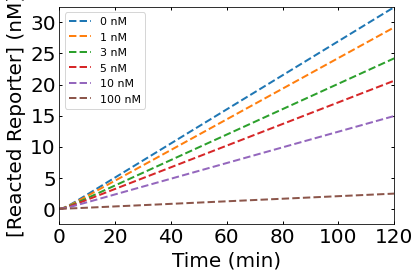

In [3]:
'''Reacted reporter kinetics of 1 nM dART for 0 to 100 IFN-γ'''

lw = 2
fs = 20

# initial conditions
L_2i_list = [0, 1, 3, 5, 10, 100]

sim2i_unbound_dART_list = []

for L in L_2i_list:
    # Calculate unbound_dART concentrations based on a Kd value and list of ligand concentrations
    sim2i_unbound_dART_list.append(calculate_unbound_dART(L, 8)) # Estimated Kd (dashed line)

# Simulation for each value of unbound_dART based on estimated Kd
for dART_unbound in sim2i_unbound_dART_list:
    React_rep = odeint(ARTIST_rxn, y0, t, args=(k_txn, k_sd, dART_unbound, Reporter0)) 
    Reporter_reacted = React_rep[:, 1]
    # plot the results
    plt.plot(t, Reporter_reacted, linestyle = '--',  label = '0 nM', linewidth=lw)


plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylim(-2.5, 32.5)
plt.xlim(0,120)
ax1 = plt.gca()
ax1.xaxis.set_tick_params(which='both',size=3,width=1,direction='in',top='on')
ax1.yaxis.set_tick_params(which='both',size=3,width=1,direction='in',right='on')
plt.xlabel('Time (min)',fontsize=fs)
plt.ylabel('[Reacted Reporter] (nM)',fontsize=fs)
plt.legend(["0 nM", "1 nM", "3 nM", "5 nM", "10 nM", "100 nM"], loc='upper left', fontsize=11)
# plt.title("IFN-γ", fontsize=fs-1, weight='bold', loc = 'right')

# plt.savefig('Figure 2i.svg')
